In [2]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt

from datetime import datetime
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                                                  #initial time starting of the runtime
#system parameters.
T=300.0                          #temparature in unit kelvin
etas=1e-3
a=2e-6                           #diameter of the probe sphere in meter

kb=1.38e-23                      #boltzman constant s.i unit
Gp=1000                          #elastic modulus for both model Pa

#some constants determined from the above parameters
m=0.0                                     #mean of the random walk motion
lamb=(etas/Gp)
k=6*pi*(a/2)*Gp   

#body of the code
xv=0.0                                   #initial x cordinate in unit micro meter
yv=0.0                                   #initial y cordinate in unit micro meter
xarr_v=[]                                #list of total x after ith step
yarr_v=[]                                #list of total y after 

t=0.0
t_arr=[]                                 #delta time array in seconds

In [3]:
lamb

1e-06

In [4]:
'''A = 4.12*10**(-10)
tau_m = 4850
power = 1.82'''
#alpha = 1e-6

In [5]:
#tau_t_arr = []
#tau_t = 0 

In [6]:
dt_min=1e-8                           #time step in unit second
dt_max=1e4
tf=0.2e8                                #total time in unit second
t = 0
while t < tf:
    #--------------------maxwell part of the code--------
    p=uniform(-8,4)
    dt=(10**p)                            #linear distributed in 10 base logscale of time

    t=t+dt
    t_arr.append(t)
    
    
    tau_t = exp(alpha*t)
    tau_t_arr.append(tau_t)
   
    
    #---------------------voigt part of the code--------
    Ax=xv*exp(-(dt/lamb*tau_t))
    Bx=sqrt(((kb*T)/k)*(1-exp(-(2*dt/lamb*tau_t))))
    
    Ay=yv*exp(-(dt/lamb*tau_t))
    By=sqrt(((kb*T)/k)*(1-exp(-(2*dt/lamb*tau_t))))
    
    xv=(gauss(Ax,Bx))
    xarr_v.append(xv)
    
    yv=(gauss(Ay,By))
    yarr_v.append(yv)
    

xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [7]:
'''min(tau_t_arr)'''

'min(tau_t_arr)'

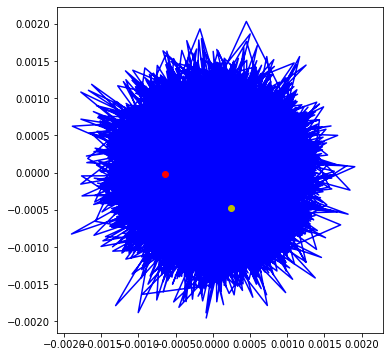

In [8]:
from pylab import rcParams
rcParams ['figure.figsize']=6,6
plt.plot(xarr_v*1e6,yarr_v*1e6,'blue')
plt.plot(xarr_v[0]*1e6,yarr_v[0]*1e6, 'ro')
plt.plot(xarr_v[-1]*1e6,yarr_v[-1]*1e6, 'yo')

#plt.ylabel(r'$\mu m$', size=20)
#plt.xlabel(r'$\mu m$', size=20)
plt.axis('square')
plt.show()


In [11]:
np.savetxt('age kvm x_arr_vts t_2.txt',xarr_v)
np.savetxt('age kvm y_arr_vts t_2.txt', yarr_v)
np.savetxt('age kvm dt_arr_vts t_2.txt',t_arr)

In [9]:
len(xarr_v)

54408

In [10]:
max(xarr_v)

1.9073844990960825e-09